<a href="https://colab.research.google.com/github/StephenTGibson/COMP527-colabNotebooks/blob/main/Missing_values%2C_normalisation%2C_classifier_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values, normalisation, classifier evaluation

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Given dataset (as an Numpy array) that contains  records about 50 persons: (Gender, Height, Weight, Index).
- Gender = 0 (Male); 1 (Female) (binary)
- Height = person's height in cm (integer)
- Weight = person's weight in kg (integer)
- Index = 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity (integer from 0 to 5)

In [2]:
dataset = np.array([[0, 174, -1, 4], [0, 189, 87, 2], [1, 185, 110, 4], [1, 195, 104, 3], [0, 149, 61, 3], [0, 1893, 104, 3], [0, 147, 92, 5], [0, 154, 111, 5], [0, 174, 2, 3], [10, 169, 103, 4], [0, 195, 81, 2], [-1, 159, 80, 4], [1, 192, 101, 3], [0, 155, 51, 2], [0, 191, 379, 2], [1, 4, 107, 5], [1, 157, 110, 5], [0, 140, 129, 5], [0, 144, 145, 5], [0, 172, 139, -5], [0, 157, 110, 5], [1, 153, 149, 5], [1, 169, 97, 4], [0, 185, 139, 5], [1, 172, 67, 2], [1, 151, 64, 3], [0, 190, 95, 3], [0, 187, 62, 1], [1, 163, 159, 5], [0, 179, 152, 5], [0, 153, 121, 5], [0, 178, 52, 1], [1, 195, 65, 1], [1, 160, 131, 5], [1, 157, 153, 5], [1, 189, 132, 4], [1, 197, 114, 3], [0, 144, 80, 4], [1, 171, 152, 5], [1, 185, 81, 2], [1, 175, 120, 4], [1, 149, 108, 5], [0, 157, 56, 2], [0, 161, 118, 5], [1, 182, 126, 4], [0, 185, 76, 2], [1, 188, 122, 4], [0, 181, 111, 4], [0, 161, 72, 3], [0, 140, 152, 5]])

1. Output the records with noisy data, i.e., records where values of some features are most likely incorrect (you can assume that Height should be in the range $[50,220]$, and Weight in the range $[50, 160]$)

In [3]:
noisyIdx = np.where((dataset[:,0]<0) | (dataset[:,0]>1) | (dataset[:,1]<50) | (dataset[:,1]>220)| (dataset[:,2]<50)| (dataset[:,2]>160)| (dataset[:,3]<0) | (dataset[:,3]>5))
noisyIdx

(array([ 0,  5,  8,  9, 11, 14, 15, 19]),)

In [4]:
noisyRecords = dataset[noisyIdx]
print(len(noisyRecords))
noisyRecords

8


array([[   0,  174,   -1,    4],
       [   0, 1893,  104,    3],
       [   0,  174,    2,    3],
       [  10,  169,  103,    4],
       [  -1,  159,   80,    4],
       [   0,  191,  379,    2],
       [   1,    4,  107,    5],
       [   0,  172,  139,   -5]])

2. Create a new dataset where noisy records (those that were identified as noisy in the previous step) are removed

In [5]:
cleanDataset = np.delete(dataset, noisyIdx, axis=0)
print(len(cleanDataset))
cleanDataset

42


array([[  0, 189,  87,   2],
       [  1, 185, 110,   4],
       [  1, 195, 104,   3],
       [  0, 149,  61,   3],
       [  0, 147,  92,   5],
       [  0, 154, 111,   5],
       [  0, 195,  81,   2],
       [  1, 192, 101,   3],
       [  0, 155,  51,   2],
       [  1, 157, 110,   5],
       [  0, 140, 129,   5],
       [  0, 144, 145,   5],
       [  0, 157, 110,   5],
       [  1, 153, 149,   5],
       [  1, 169,  97,   4],
       [  0, 185, 139,   5],
       [  1, 172,  67,   2],
       [  1, 151,  64,   3],
       [  0, 190,  95,   3],
       [  0, 187,  62,   1],
       [  1, 163, 159,   5],
       [  0, 179, 152,   5],
       [  0, 153, 121,   5],
       [  0, 178,  52,   1],
       [  1, 195,  65,   1],
       [  1, 160, 131,   5],
       [  1, 157, 153,   5],
       [  1, 189, 132,   4],
       [  1, 197, 114,   3],
       [  0, 144,  80,   4],
       [  1, 171, 152,   5],
       [  1, 185,  81,   2],
       [  1, 175, 120,   4],
       [  1, 149, 108,   5],
       [  0, 1

3. In the cleaned dataset, compute the means (i.e., average) of Height and Weight features (rounded to the nearest integer)

In [11]:
means = np.round(np.mean(cleanDataset, 0))

In [12]:
meanHeight = means[1]
meanHeight

169.0

In [13]:
meanWeight = means[2]
meanWeight

105.0

4. Plot the data points from the cleaned dataset: For every record, plot the point with coordinates (Height, Weight), i.e. Height is along the X-axis and Weight is along the Y-axis. Use different colors/shapes of points for records with different value of Index. Can you see separation between the classes of objects with different values of Index?

In [48]:
np.unique(cleanDataset[:,3])

array([1, 2, 3, 4, 5])

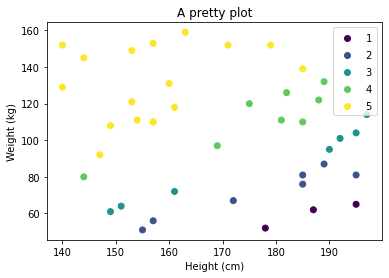

In [81]:
fig, ax = plt.subplots()


ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_title('A pretty plot')

ax = ax.scatter(
    cleanDataset[:,1],
    cleanDataset[:,2],
    c = cleanDataset[:,3],
    
    #label = cleanDataset[:,3]
    )



plt.legend(*ax.legend_elements())




---

## Exercise 2

Given a dataset of objects with 2 features, create new datasets where both features are normalised.

In [ ]:
dataset2 = np.array([[116.87714213,  22.38724318],[ 98.05089468,  17.70419866],[121.91732905,  20.76950035],[150.60375643,  20.44777321],[116.15969721,  20.22792041],[175.55264595,  21.02920868],[130.2102414 ,  22.23461658],[117.79758934,  21.54449521],[199.05450964,  20.53902401],[155.00458477,  20.67588878],[160.27851623,  20.30877322],[142.49587465,  18.75387901],[167.32252309,  21.2040159 ],[178.11489609,  19.52285308],[135.76602655,  18.01816954],[117.62628615,  20.95436217],[171.74626081,  20.37269529],[130.11860385,  19.56387712],[122.68044125,  21.48927022],[159.43238282,  21.38030275],[108.78123817,  19.86203164],[152.70729255,  21.24708246],[143.64358057,  21.40357256],[209.68785285,  19.65378059],[133.08486628,  19.23372601],[138.2204662 ,  20.37983756],[143.65610499,  19.92235183],[143.29146765,  20.56157279],[106.79099845,  19.35181412],[208.89304694,  19.9697894 ],[183.55451445,  20.36281171],[144.46962995,  19.83011097],[174.87583233,  20.25079178],[137.33207546,  21.02909898],[187.74834101,  20.23883521],[127.59840561,  21.7328862 ],[110.15966458,  19.29460209],[130.82208863,  18.98107528],[166.72373008,  20.63258552],[154.50866392,  21.05583445],[190.93412702,  21.08776453],[148.62481651,  19.40248102],[115.50503568,  18.39916603],[155.39233722,  20.23610734],[146.44242825,  20.30917973],[114.21209804,  19.10945672],[140.4159023 ,  19.96369514],[140.82108456,  20.05603083],[129.50278428,  18.92210224],[174.88635445,  19.03980704]])

1. Normalise features with $[0,1]$-scaling

2. Normalise features with Gaussian normalisation

3. In three different plots show the original data, $[0,1]$-normilised, and Gaussian normalised data.

---

## Exercise 3

Given training ($\texttt{y_true}$) and predicted ($\texttt{y_pred}$) data for binary classification, where 1 corresponds to the positive class and 0 corresponds to the negative class, compute
1. The number of True Positives, True Negatives, False Positives, False Negatives
2. Accuracy
3. Precision
4. Recall
5. F-score

In [ ]:
y_true = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

---

## Exercise 4

Given training and predicted data for 4-class classification, where classes are 0,1,2,3

In [ ]:
y_true = np.array([1, 2, 3, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 2, 0, 0, 1,3, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 2, 0, 1, 3, 0, 1,3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 1,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2,2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 1, 3,1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 2, 1, 3,1, 0])
y_pred = np.array([1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1,3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 2, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 0, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 3,2, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 2, 3,1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 3,1, 0])

1. Compute the confusion matrix, i.e. a 4x4 matrix $\overline{A}$, in which an element $\overline{A}_{i,j}$ contains the number of elements that were predicted to be in class $i$, while their true class is $j$

2. Compute Precision, Recall, F-score for every class, and compute the macro F-score